# Analysis for Instagram Posts and it's impressions

* This DataFrame contains detailed information about Instagram posts and their performance.
Each row represents one Instagram post, and each column provides specific metrics describing its content, engagement, and reach.

### Questions to be Answered depending on the Analysis
- Which posts have the highest impressions?
** post no. 102 has highest number of impressions (36919)
- What is the average number of impressions across all posts?
** The Average no. of Impressions on the posts = 5920.25 impression
- Does higher engagement (likes + comments + shares + saves) lead to higher impressions?
** it is not necessary that higher impressions have higher engagements (likes + comments + shares + saves)
** the post 102 has higher impressions and the post no 101 has higher engagements
- Which posts got many impressions but low engagement (likes + comments + shares + saves)?
- Which posts got low impressions but high engagement (likes + comments + shares + saves)?
- Which hashtags contribute the most to impressions?
- Which hashtags are overused but not effective?
- What improvements in captions, hashtags could increase impressions?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Instagram data.csv', encoding="latin-1")

In [3]:
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [4]:
# Here , We have 119 rows (posts) and 13 column (comments - likes - shares - follows - views - .... ) that we have to make analysis on it 
df.shape

(119, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
# - we don't have any missing values 
# - all columns types are correct 

In [7]:
df_copy = df.copy()

In [8]:
# check for duplicates
df.duplicated().sum()

np.int64(17)

In [9]:
# we found 17 row duplicated

In [10]:
# we will drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# to check that we don't have duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
# here we have alot of hashtags and i need to seperate them to be able to use them in analysis
df['Hashtags'] = df['Hashtags'].str.split('#')

In [13]:
pd.set_option('display.max_columns', None)
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in..."
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,"[, healthcare , health , covid , data , datasc..."


In [14]:
# here , i seperate the first main hashtag and put it in new column
df['main_hashtag'] = df['Hashtags'].apply(lambda x : x[1])

In [15]:
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",finance
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,"[, healthcare , health , covid , data , datasc...",healthcare


In [16]:
# this is the column of main hashtag 
pd.set_option('display.max_rows', 10)
df['main_hashtag']

0                finance 
1             healthcare 
2                   data 
3                 python 
4      datavisualization 
              ...        
114          datascience 
115      machinelearning 
116      machinelearning 
117          datascience 
118               python 
Name: main_hashtag, Length: 102, dtype: object

In [17]:
# give name of each post to easily get it in future
df.index = [f"post {i+1}" for i in range(len(df))]


In [18]:
df.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",finance
post 2,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,"[, healthcare , health , covid , data , datasc...",healthcare
post 3,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,"[, data , datascience , dataanalysis , dataana...",data


In [19]:
# create a new dataframe to make each post shows all hashtag in each row 
hastags_df = df.explode('Hashtags')

In [20]:
hastags_df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,finance,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,money,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,business,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,investing,finance


In [21]:
hastags_df = hastags_df[hastags_df["Hashtags"].str.strip() != ""]


In [22]:
hastags_df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,finance,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,money,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,business,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,investing,finance
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,investment,finance


In [23]:
# we found that we have 1892 hashtag for all posts 
hastags_df.shape

(1892, 14)

In [24]:
hastags_df.index.name = 'Post'

In [25]:
# here , grouped all hashtags and know the count of each hashtag and sort them ascendingly 
grouped = hastags_df.groupby('Hashtags').size()
grouped.sort_values(ascending=False)

Hashtags
amankharwal           93
python                93
pythonprogramming     84
machinelearning       80
datascience           79
                      ..
stress                 1
softskills             1
ukraine                1
whatsapp               1
work                   1
Length: 175, dtype: int64

In [26]:
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",finance
post 2,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,"[, healthcare , health , covid , data , datasc...",healthcare


## post no. 102 has highest number of impressions (36,919)
## 11.3% of impressions got from Hashtags & 44.5% from Explore
## to increase no. of impressions on post we have to look about factors make the post appear at explore more than put more hastags 

In [27]:
from_hashtag_source = (4176 / 36919) * 100
from_explore_source = (16444/36919) * 100
print(from_hashtag_source)
print(from_explore_source)

11.311248950404941
44.54075137463095


In [28]:
max_impressions = df[df['Impressions'] == df['Impressions'].max()]
max_impressions

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag
post 102,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,"[, python , pythonprogramming , pythonprojects...",python


In [29]:
# give name to the column of posts 
df.index.name = 'Post'

In [30]:
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag
Post,,,,,,,,,,,,,,
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",finance
post 2,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,"[, healthcare , health , covid , data , datasc...",healthcare


In [31]:
# here describe all columns data 
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5920.254902,2496.911765,1968.284314,1178.568627,184.549020,156.549020,6.352941,9.303922,176.823529,54.666667,22.823529
std,5139.888111,1588.377397,1977.298128,2797.212621,309.096051,157.770332,3.308097,10.150149,85.151747,93.169954,43.685966
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3556.000000,1923.750000,753.000000,178.750000,40.250000,70.500000,4.000000,3.000000,122.000000,16.000000,4.000000
50%,4343.500000,2216.000000,1326.000000,337.000000,75.000000,111.000000,6.000000,6.500000,157.500000,24.000000,8.000000
75%,6296.250000,2605.250000,2415.750000,728.500000,218.500000,173.500000,8.000000,13.000000,208.750000,45.750000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


## The Average no. of Impressions on the posts = 5920.25 impression.
## The Max. no. of likes on a post is 549 like .
## The Max no. of profile visit from a post is 611 visit.

In [32]:
# put column of total engagement which is sum of  (likes + comments + shares + saves)
df['Engagements'] = df['Saves'] + df['Comments'] + df['Shares'] + df['Likes']

In [33]:
df.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag,Engagements
Post,,,,,,,,,,,,,,,
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",finance,274
post 2,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,"[, healthcare , health , covid , data , datasc...",healthcare,439
post 3,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,"[, data , datascience , dataanalysis , dataana...",data,184


In [34]:
higher_engagement = df[df['Engagements'] == df['Engagements'].max()]
higher_engagement

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag,Engagements
Post,,,,,,,,,,,,,,,
post 101,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,"[, datascience , datasciencejobs , datascience...",datascience,1721


In [35]:
max_impressions = df[df['Impressions'] == df['Impressions'].max()]
max_impressions

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag,Engagements
Post,,,,,,,,,,,,,,,
post 102,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,"[, python , pythonprogramming , pythonprojects...",python,1127


## - it is not necessary that higher impressions have higher engagements (likes + comments + shares + saves)
## - the post 102 has higher impressions and the post no 101 has higher engagements

In [36]:
pd.set_option('display.max_rows', 5)
df.sort_values('Impressions',ascending=False)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag,Engagements
Post,,,,,,,,,,,,,,,
post 102,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,"[, python , pythonprogramming , pythonprojects...",python,1127
post 101,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,"[, datascience , datasciencejobs , datascience...",datascience,1721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
post 21,2064,1304,362,249,37,49,4,5,76,9,0,A boxplot is a statistical data visualization ...,"[, datavisualization , datascience , data , da...",datavisualization,134
post 40,1941,1466,411,37,17,49,6,3,82,8,2,A neural network is a computational structure ...,"[, neuralnetwork , machinelearning , artificia...",neuralnetwork,140


In [37]:
pd.set_option('display.max_rows', 5)
df.sort_values('Engagements',ascending=False)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag,Engagements
Post,,,,,,,,,,,,,,,
post 101,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,"[, datascience , datasciencejobs , datascience...",datascience,1721
post 102,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,"[, python , pythonprogramming , pythonprojects...",python,1127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
post 39,2191,1308,809,45,18,35,2,1,72,18,0,Language detection is a natural language proce...,"[, data , datascience , dataanalysis , dataana...",data,110
post 7,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,"[, stockmarket , investing , stocks , trading ...",stockmarket,104


In [38]:
pd.set_option('display.max_rows', None)
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Engagements
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5920.254902,2496.911765,1968.284314,1178.568627,184.549020,156.549020,6.352941,9.303922,176.823529,54.666667,22.823529,349.029412
std,5139.888111,1588.377397,1977.298128,2797.212621,309.096051,157.770332,3.308097,10.150149,85.151747,93.169954,43.685966,242.998165
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,104.000000
25%,3556.000000,1923.750000,753.000000,178.750000,40.250000,70.500000,4.000000,3.000000,122.000000,16.000000,4.000000,211.500000
50%,4343.500000,2216.000000,1326.000000,337.000000,75.000000,111.000000,6.000000,6.500000,157.500000,24.000000,8.000000,289.000000
75%,6296.250000,2605.250000,2415.750000,728.500000,218.500000,173.500000,8.000000,13.000000,208.750000,45.750000,18.000000,392.250000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000,1721.000000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

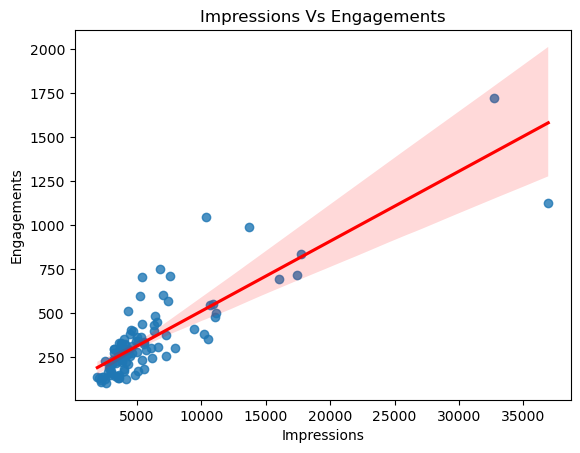

In [40]:
sns.regplot(data=df,x='Impressions',y='Engagements',line_kws={'color': 'red'})
plt.title('Impressions Vs Engagements')
plt.xlabel('Impressions')
plt.ylabel('Engagements')
plt.show()

## - The above chart shows that there is a postive relation between Engagements and Impressions

<Axes: xlabel='main_hashtag'>

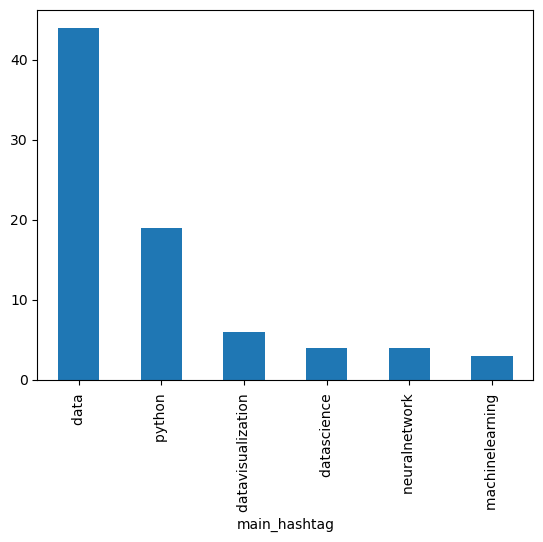

In [41]:
df['main_hashtag'].value_counts()[:6].plot(kind='bar')

## below chart represent the most 20 repeated Hashtags in all posts

below chart represent the most 20 repeated Hashtags in all posts


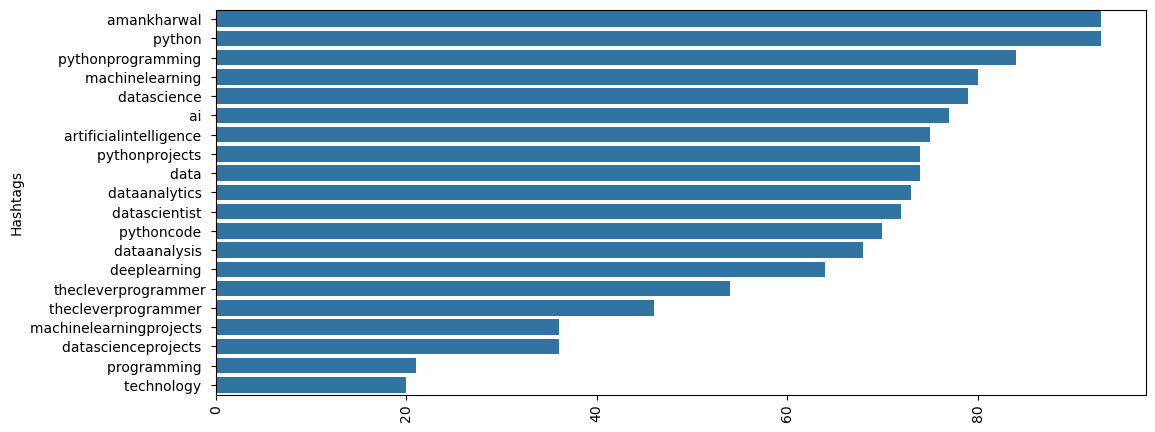

In [42]:
print('below chart represent the most 20 repeated Hashtags in all posts')
plt.figure(figsize=(12,5))
sns.barplot(grouped.sort_values(ascending=False).head(20),orient='h')
plt.xticks(rotation = 90)
plt.show()

In [43]:
corr_matrix = df[['Impressions','Profile Visits','Likes','Comments','Engagements']].corr()
corr_matrix

,Impressions,Profile Visits,Likes,Comments,Engagements
Impressions,1.000000,0.762679,0.852952,-0.008535,0.839993
Profile Visits,0.762679,1.000000,0.642658,0.136590,0.483198
Likes,0.852952,0.642658,1.000000,0.163383,0.930257
Comments,-0.008535,0.136590,0.163383,1.000000,0.068998
Engagements,0.839993,0.483198,0.930257,0.068998,1.000000


<Axes: >

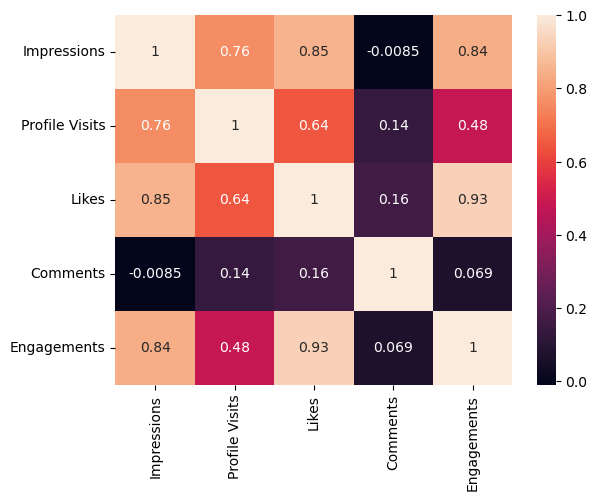

In [44]:
sns.heatmap(corr_matrix,annot=True)

## The more likes a post gets, the higher its engagement.
## Posts that reach more people tend to get more interactions and profile visits.
## More profile visits often accompany increased interactions.
## Comment behavior is independent and does not follow the same trend as likes or impressions.

# Summary:
# This heatmap indicates that your Instagram performance is mainly driven by likes, impressions, and engagements, 
# which all move very closely together. Comments, however, 
# behave differently and are not strongly influenced by other metrics.

In [45]:
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,main_hashtag,Engagements
Post,,,,,,,,,,,,,,,
post 1,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",finance,274


In [46]:
from wordcloud import WordCloud, STOPWORDS

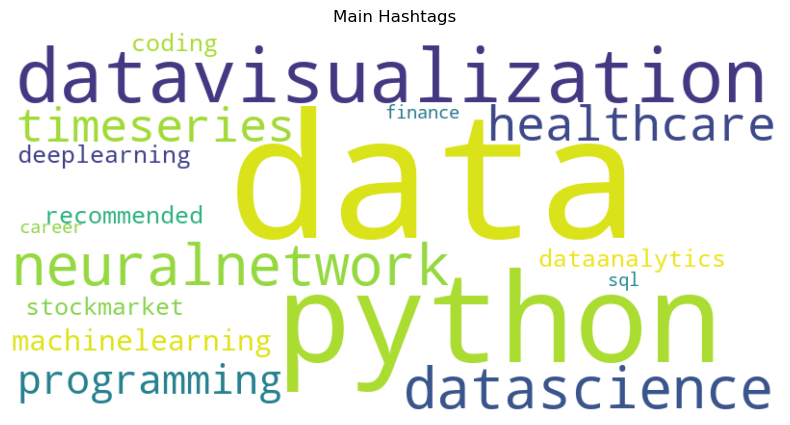

In [47]:
text = " ".join(df['main_hashtag'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Main Hashtags")
plt.show()

this is the percentage of different traffic sources dustribution


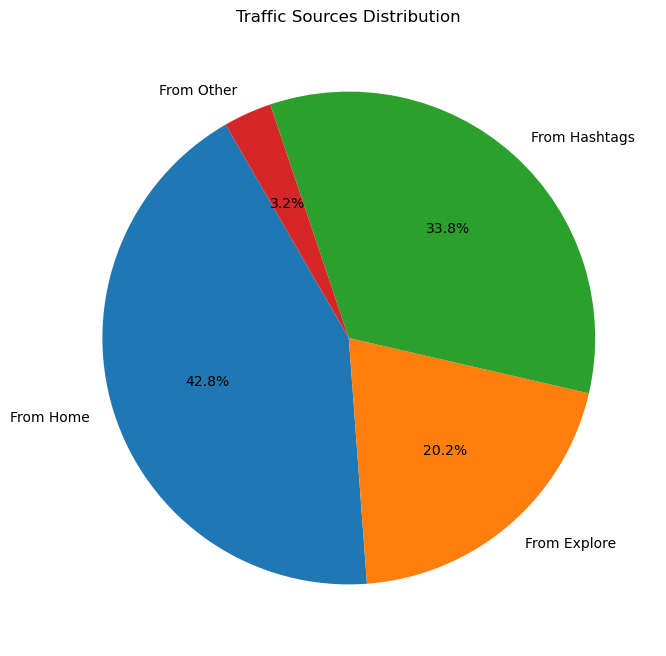

In [48]:
print('this is the percentage of different traffic sources dustribution')
sum_home = df['From Home'].sum()
sum_explore = df['From Explore'].sum()
sum_hashtags = df['From Hashtags'].sum()
sum_other = df['From Other'].sum()

labels = ['From Home', 'From Explore', 'From Hashtags', 'From Other']
values = [sum_home, sum_explore, sum_hashtags, sum_other]

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=120)
plt.title("Traffic Sources Distribution")

plt.show()

In [49]:
# 📈 Traffic Sources Distribution Analysis:

# This pie chart, titled "Traffic Sources Distribution," illustrates the relative percentages of traffic received from four distinct sources.

# The dominant traffic source is "From Home," which accounts for the largest share at 42.8%.

#The second largest source is "From Hashtags," contributing 33.8% of the total traffic.

#"From Explore" is the third significant source, making up 20.2%.

#The smallest portion of traffic comes "From Other" sources, representing only 3.2%.

#In summary, over three-quarters of the traffic (76.6%) originates from "Home" and "Hashtags" combined.

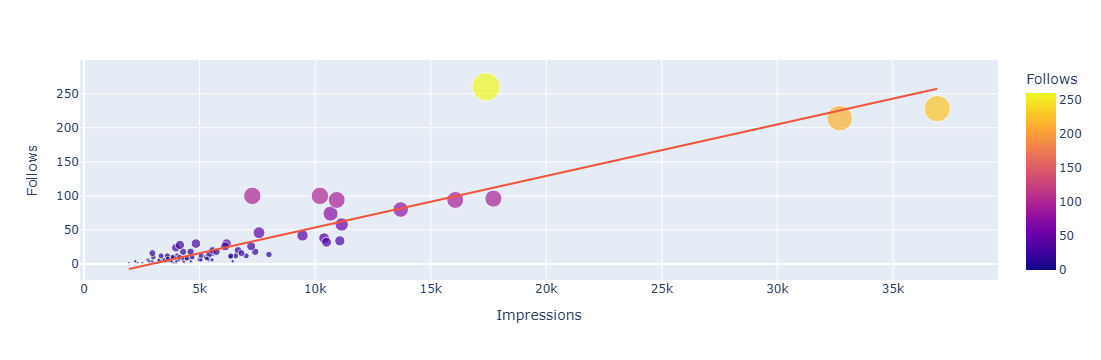

In [54]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Impressions",
    y="Follows",
    color="Follows",
    trendline='ols',
    size="Follows",
    hover_name="Follows"
)
fig.show()

In [55]:
#📊 Impressions vs. Follows Scatter Plot
#This chart is a scatter plot that visualizes the relationship between Impressions (on the x-axis, in thousands) and Follows (on the y-axis).

#Key Features:
#Scatter Plot: Each point represents a data instance (likely a post or time period), showing its corresponding Impressions and Follows count.

#Color Bar (Follows): The points are color-coded based on the number of Follows they generated, as indicated by the vertical legend on the right. Darker colors (indigo/purple) represent fewer follows, and lighter colors (yellow/orange) represent more follows.

#Trend Line (Regression Line): An orange/red straight line is drawn through the data. This line represents a positive linear trend, suggesting that as the number of Impressions increases, the number of Follows generally tends to increase as well.

#Data Distribution:

#Most data points are clustered in the lower-left section of the plot, primarily below 20,000 Impressions and under 100 Follows.

#There is one significant outlier in the upper-right corner at approximately 32,000+ Impressions and 210+ Follows (indicated by the bright yellow point), which strongly influences the trend line.

#There are a few points with high Follows (around 90-100) even at relatively lower Impressions (between 7,500 and 12,500), suggesting these instances were highly effective at conversion.

#In summary, the chart confirms a correlation where higher impressions are associated with a greater number of follows, although there are variations in the conversion rate across different data points.